In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json('logins.json')

In [3]:
len(data)

93142

In [4]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
data.dtypes

login_time    datetime64[ns]
dtype: object

In [6]:
data['time_window'] = data['login_time'].dt.floor('15T')

In [7]:
data.head(10)

,login_time,time_window
0,1970-01-01 20:13:18,1970-01-01 20:00:00
1,1970-01-01 20:16:10,1970-01-01 20:15:00
2,1970-01-01 20:16:37,1970-01-01 20:15:00
3,1970-01-01 20:16:36,1970-01-01 20:15:00
4,1970-01-01 20:26:21,1970-01-01 20:15:00
5,1970-01-01 20:21:41,1970-01-01 20:15:00
6,1970-01-01 20:12:16,1970-01-01 20:00:00
7,1970-01-01 20:35:47,1970-01-01 20:30:00
8,1970-01-01 20:35:38,1970-01-01 20:30:00
9,1970-01-01 20:47:52,1970-01-01 20:45:00


In [8]:
aggregated_data = data.groupby('time_window')['login_time'].count().reset_index()
aggregated_data = aggregated_data.rename(columns={'login_time': 'login_count'})

In [9]:
aggregated_data.head(10)

,time_window,login_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
5,1970-01-01 21:15:00,4
6,1970-01-01 21:45:00,4
7,1970-01-01 22:00:00,9
8,1970-01-01 22:15:00,8
9,1970-01-01 22:30:00,1


In [10]:
len(aggregated_data)

9381

In [11]:
aggregated_data.dtypes

time_window    datetime64[ns]
login_count             int64
dtype: object

Text(0, 0.5, 'Login Count')

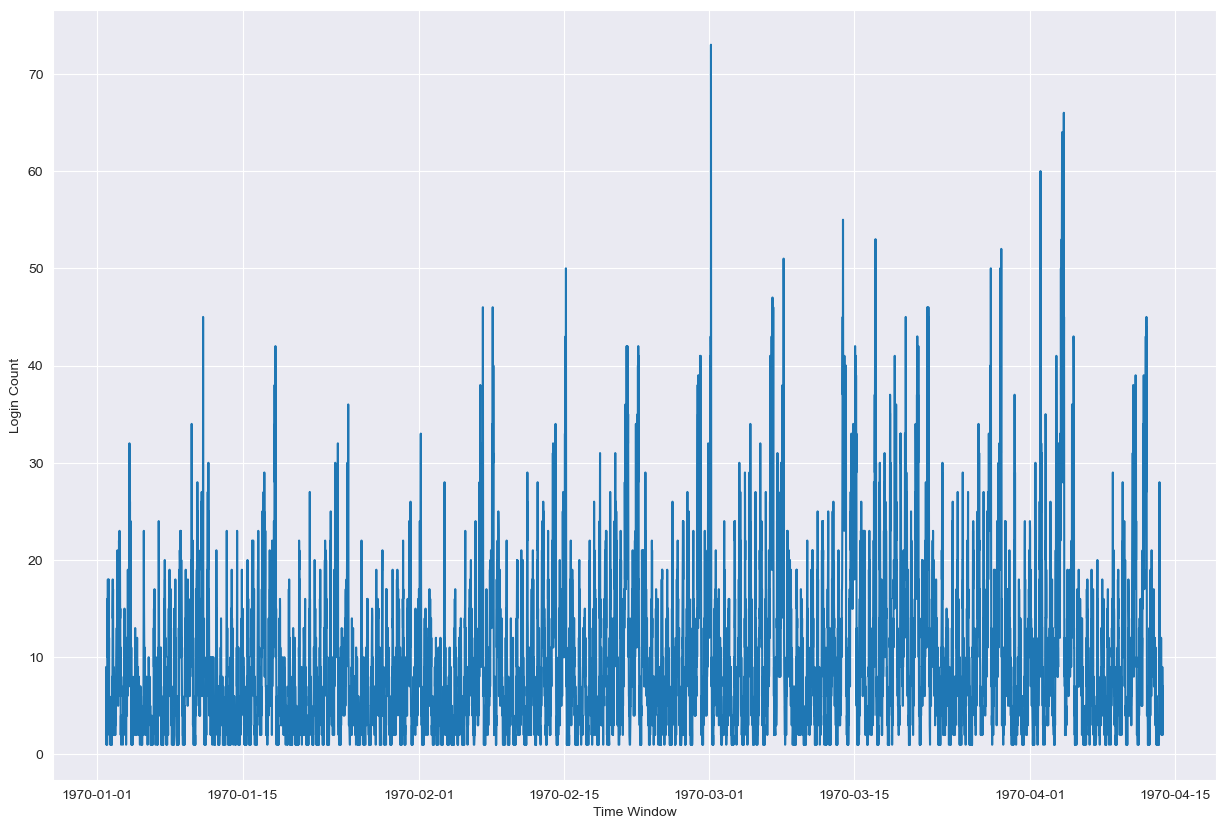

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
sns.lineplot(data = aggregated_data, x = 'time_window', y = 'login_count')
plt.xlabel('Time Window')
plt.ylabel('Login Count')

That's a bit smooshed and isn't very nice to look at, I'll make seperate graphs for each month. 

In [13]:
aggregated_data['Month'] = aggregated_data['time_window'].dt.month_name()
aggregated_data['Date'] = aggregated_data['time_window'].dt.date
aggregated_data['Time'] = aggregated_data['time_window'].dt.time
aggregated_data['Day'] = aggregated_data['time_window'].dt.day_name()
aggregated_data['Hour'] = aggregated_data['time_window'].dt.hour

In [14]:
aggregated_data.head()

,time_window,login_count,Month,Date,Time,Day,Hour
0,1970-01-01 20:00:00,2,January,1970-01-01,20:00:00,Thursday,20
1,1970-01-01 20:15:00,6,January,1970-01-01,20:15:00,Thursday,20
2,1970-01-01 20:30:00,9,January,1970-01-01,20:30:00,Thursday,20
3,1970-01-01 20:45:00,7,January,1970-01-01,20:45:00,Thursday,20
4,1970-01-01 21:00:00,1,January,1970-01-01,21:00:00,Thursday,21


In [15]:
aggregated_data.dtypes

time_window    datetime64[ns]
login_count             int64
Month                  object
Date                   object
Time                   object
Day                    object
Hour                    int32
dtype: object

In [16]:
aggregated_data.head()

,time_window,login_count,Month,Date,Time,Day,Hour
0,1970-01-01 20:00:00,2,January,1970-01-01,20:00:00,Thursday,20
1,1970-01-01 20:15:00,6,January,1970-01-01,20:15:00,Thursday,20
2,1970-01-01 20:30:00,9,January,1970-01-01,20:30:00,Thursday,20
3,1970-01-01 20:45:00,7,January,1970-01-01,20:45:00,Thursday,20
4,1970-01-01 21:00:00,1,January,1970-01-01,21:00:00,Thursday,21


In [17]:
jan = aggregated_data[aggregated_data['Month'] == 'January']


In [18]:
jan.head()

,time_window,login_count,Month,Date,Time,Day,Hour
0,1970-01-01 20:00:00,2,January,1970-01-01,20:00:00,Thursday,20
1,1970-01-01 20:15:00,6,January,1970-01-01,20:15:00,Thursday,20
2,1970-01-01 20:30:00,9,January,1970-01-01,20:30:00,Thursday,20
3,1970-01-01 20:45:00,7,January,1970-01-01,20:45:00,Thursday,20
4,1970-01-01 21:00:00,1,January,1970-01-01,21:00:00,Thursday,21


In [19]:
feb = aggregated_data[aggregated_data['Month'] == 'February']
march = aggregated_data[aggregated_data['Month'] == 'March']
april = aggregated_data[aggregated_data['Month'] == 'April']

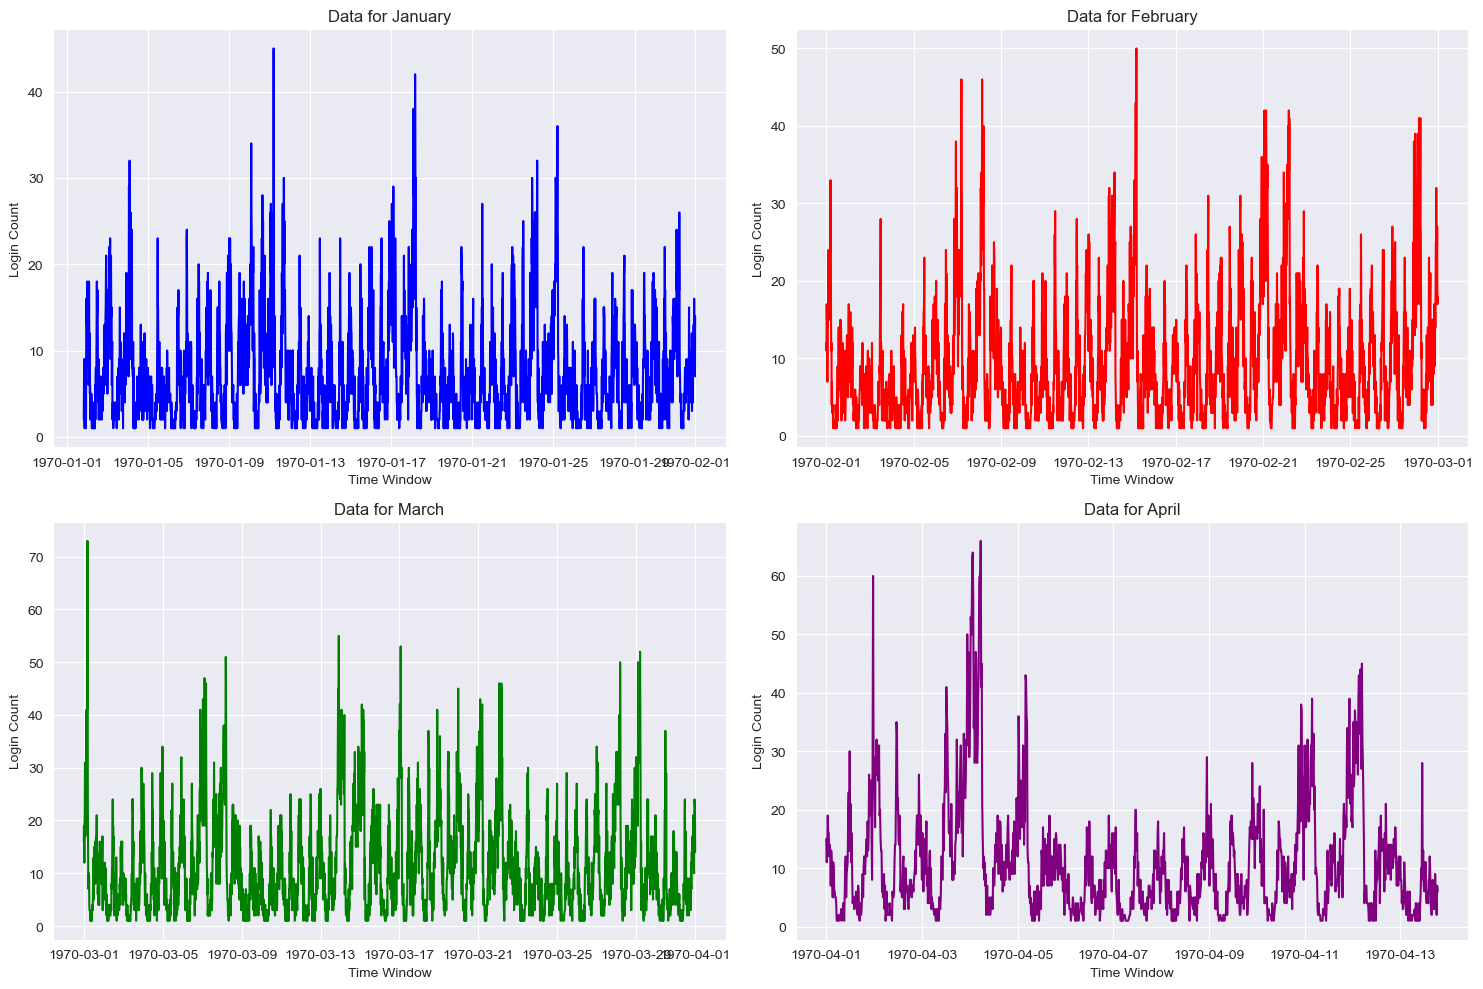

In [20]:
months_data = [jan, feb, march, april]
colors = ['blue', 'red', 'green', 'purple']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes = axes.flatten()

for i, month_data in enumerate(months_data):
    plt.subplot(2, 2, i + 1)
    sns.lineplot(data=month_data, x='time_window', y='login_count', color=colors[i])
    plt.xlabel('Time Window')
    plt.ylabel('Login Count')
    plt.title(f'Data for {month_data["time_window"].dt.month_name().iloc[0]}')

plt.tight_layout()
plt.show()

These are still hard to interpret, I think heatmaps will better display daily / monthly demand at certain times of day. 

Text(122.72222222222221, 0.5, 'Hour of the Day')

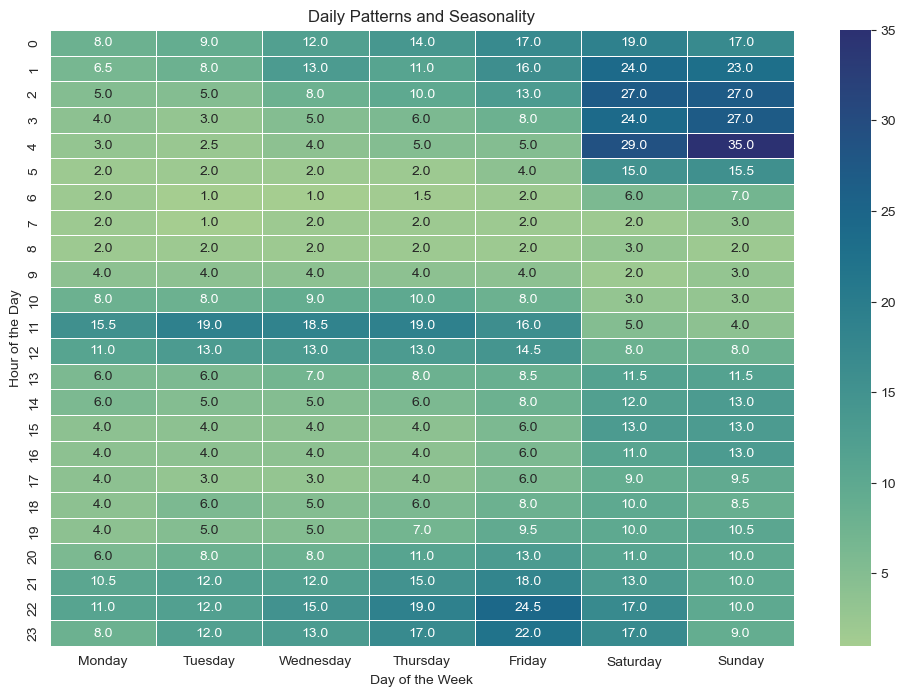

In [21]:
pivot_table = aggregated_data.pivot_table(index='Hour', columns='Day', values='login_count', aggfunc='median')

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(columns=days_order)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='crest', annot=True, fmt=".1f", linewidths=.5)
plt.title('Daily Patterns and Seasonality')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')

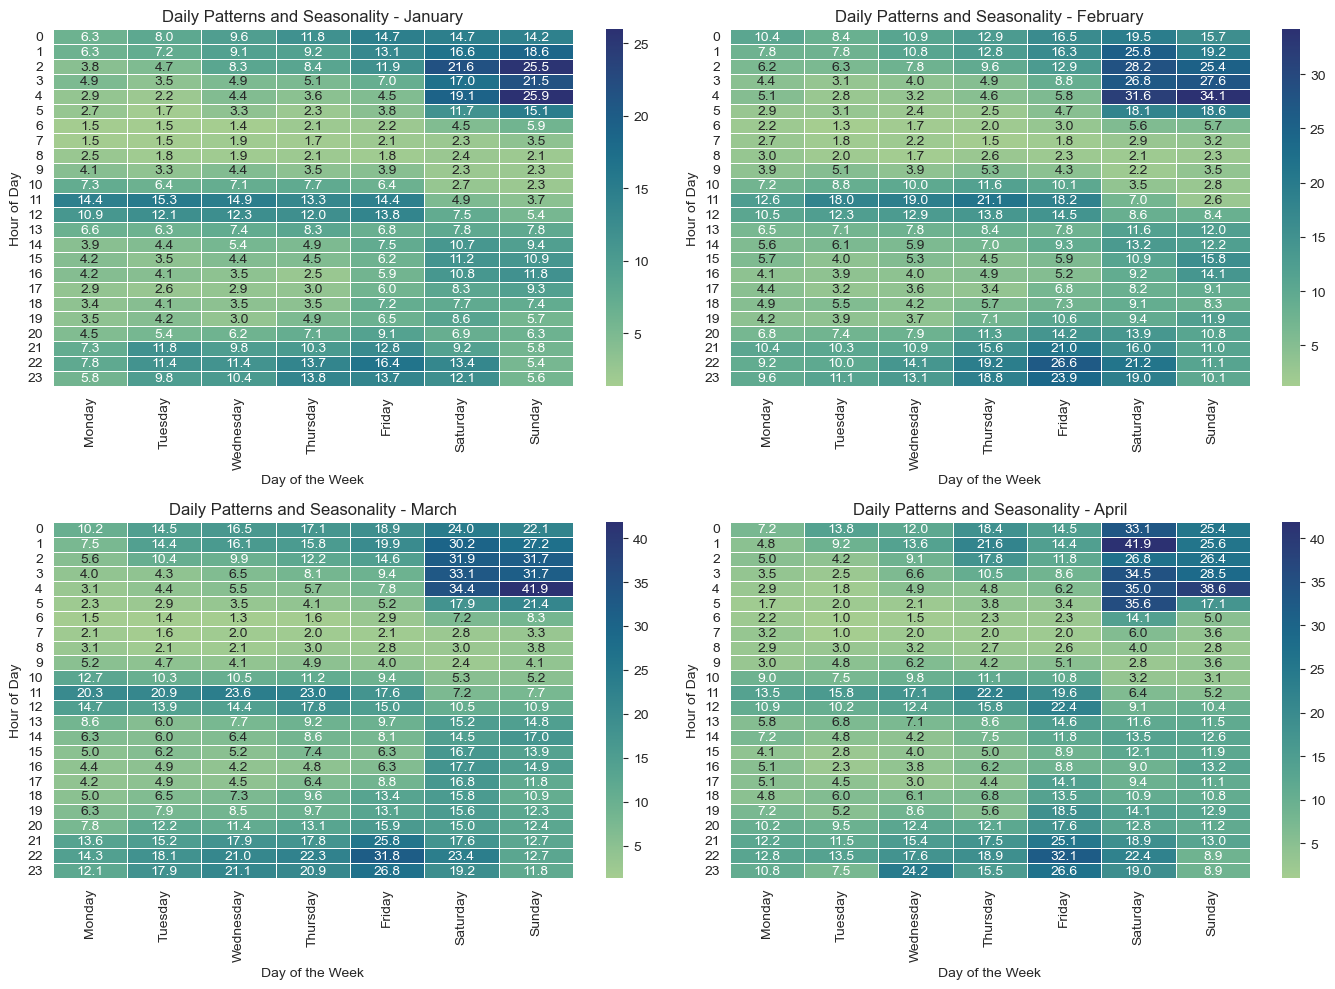

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

axes = axes.flatten()

unique_months = aggregated_data['Month'].unique()

for i, month in enumerate(unique_months):
    monthly_data = aggregated_data[aggregated_data['Month'] == month]
    pivot_table = monthly_data.pivot_table(index='Hour', columns='Day', values='login_count', aggfunc='mean')
    pivot_table = pivot_table.reindex(columns=days_order)
    sns.heatmap(pivot_table, cmap='crest', annot=True, fmt=".1f", linewidths=.5, ax=axes[i])
    axes[i].set_title(f'Daily Patterns and Seasonality - {month}')
    axes[i].set_xlabel('Day of the Week')
    axes[i].set_ylabel('Hour of Day')

plt.tight_layout()

Above, we have five graphs. Each graph breaks down every day of the week by each hour of the day, displaying the average login count for each. The top graph encompasses all the data, while the bottom four represent each specific month in our dataset.

Results consistently align with each other, with the highest average demand observed in the early morning hours on Saturday and Sunday.

## Average Demand Per Month

#### The average demand for January peaked between 4:00 and 5:00 am on Saturday.

#### The average demand for February peaked between 4:00 and 5:00 am on Sunday.

#### The average demand for March peaked between 4:00 and 5:00 am on Sunday.

#### The average demand for April peaked between 1:00 and 2:00 am on Saturday.

#### With the exception of April, demand peaked at the same time of day and the same day of the week each month.

## Daily Cycles

#### Daily cycles appear consistent, both as a whole and broken down by month. For each weekday, average demand peaks between 11:00 am and noon, with a resurgence after 8:00 pm. The highest resurgence appears on Friday night, which makes sense given the propensity of people to go out on a Friday night for a night of fun. Weekend peaks can be seen above.